# Assignment 2: Naive Bayes [20 marks]

Student Name: Timothy Holland

Student ID: 697004

## General info

<b>Due date</b>: Friday, 2 September 2022, 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count)
<ul>
    <li>one day late, -2.0;</li>
    <li>two days late, -4.0;</li>
    <li>three days late, -6.0;</li>
    <li>four days late, -8.0;</li>
    <li>five days late, -10.0;</li>
</ul>

<b>Marks</b>: 20% of mark for class. 

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/126693/pages/python-and-jupyter-notebooks?module_item_id=3950453) on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer.If your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should implement functions for the skeletons listed below. You may implement any number of additional (helper) functions. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficiency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 4 marks for unreadable or excessively inefficient code.

7 of the marks available for this Project will be assigned to whether the five specified Python functions work in a manner consistent with the materials from COMP90049. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

13 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (Piazza -> Assignments -> A2); we recommend you check it regularly.

<b>Academic misconduct</b>: While you may discuss this homework in general terms with other students, it ultimately is still an individual task. Reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/126693/modules#module_734188">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -10.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -5.0
</UL>

## Part 1: Base code [7 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the features as nominal and use them as provided (e.g., do **not** convert them to other feature types, such as numeric ones). Implement a Naive Bayes classifier with appropriate likelihood function for the data.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms. You must use epsilon smoothing strategy as discussed in the Naive Bayes lecture. 
4. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation.
5. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)*
6. Please place the jupyter notebook into the same folder as the input data.


## Preprocess Functionality

In [1]:
# This function should open a csv file and read the data into a useable format [0.5 mark]

##############################################################################

import pandas as pd
from sklearn.preprocessing import LabelEncoder

##############################################################################

# Processes csv data into usable form
# @filename: String name of file
# Returns: returns dataframe and series
def preprocess(filename, encode=False):
    
    data = pd.read_csv(filename)
    
    if ('ID' in data):
        data = data.drop(columns='ID')
    
    if(encode):
        data = data.apply(LabelEncoder().fit_transform)
        
    # Shorten column names
    for feature in data:
        if (len(feature) > 15):
            new_acronym = acronym(feature)
            data = data.rename(columns={feature: new_acronym})
        
    if ('label' in data):
        labels = data['label']
        instances = data.drop(columns='label')
        
    return instances, labels


# Mutates feature into acronym
# Works only for underscore
# @feature: string to be shortened
# Return: string acronym
def acronym(feature):
    
    words = feature.split("_")
    acron = ""
    
    for i in words:
        acron+=i[0].upper()
        
    return acron

##############################################################################
    

## Naive Bayes Model

In [2]:
# This function should build a supervised NB model [3 marks]

##############################################################################

import pandas as pd

##############################################################################

# Multinomial Naive Bayes Class
# Generated through dataset of instances and labels
# Stores key information regarding MNB distribution probabilities
class Mnb:
    
    # MNB Constructor
    # @instances: dataframe of instances to be trained on
    # @labels: series of labels to assist training
    def __init__(self, instances=None, labels=None):
        
        self.initialise()
        
        # Trains model
        if (isinstance(instances, pd.DataFrame) 
            and isinstance(labels, pd.Series)):
            
            self.train(instances, labels)        
    
    
    # Initialises essentials
    def initialise(self):
    
        self.name = 'Multinomial Naive Bayes Classifier'
        self.instances = None
        self.labels = None
        self.data_size = 0
        self.features_size = 0
        self.label_size = 0
        self.label_values = []
        self.label_counts = None
        self.prior_probs = {}
        self.cond_counts = {}
        self.cond_probs = {}
        self.model = {}
    
    
    #########################################################################
    
    # Trains Naive Bayes model given dataframe of instances and series of labels
    # @instances: dataframe 
    # @labels: series
    def train(self, instances, labels):

        # Populate model data objects
        self.instances = instances
        self.labels = labels
        self.data_size = len(instances)
        self.features_size = len(instances.columns)
        self.label_counts = labels.value_counts()
        for label, count in self.label_counts.iteritems():
            self.label_values.append(label)
        self.label_size = len(self.label_counts)
        
        # Generate Probabilities
        self.prior_probs = self.gen_prior_probs(self.label_counts, self.data_size)
        self.cond_counts, self.cond_probs = self.gen_cond_probs(instances, 
                                                                labels, self.label_counts)       

        
    #########################################################################        

    ### Helper Methods
    
    # Generate prior probabilities
    # @label_counts: series of labels and their tally
    # @data_size: int 
    # Returns: dictionary of prior probabilities
    def gen_prior_probs(self, label_counts, data_size):

        prior_probs = {}

        for label, count in label_counts.iteritems():
            prior_probs[label] = count/data_size

        return prior_probs

    
    # Generate conditional probabilities
    # @instances: dataframe of instances
    # @labels: series of labels
    # @label_counts: series of label counts
    # Returns: counts and probabilities for likelihoods
    def gen_cond_probs(self, instances, labels, label_counts):

        # Smoothing operator
        epsilon = 1e-9

        # Initialising counter and probability data structures
        cond_counts = self.gen_nb_ds(instances, label_counts, 0)
        cond_probs = self.gen_nb_ds(instances, label_counts, epsilon)

        # Generate counts for each feature value event
        for feature, series in instances.iteritems():
            for idx, value in series.iteritems():

                # Gather class label
                inst_label = labels.loc[idx]
                # Increment count
                cond_counts[feature][inst_label][value] += 1

        # Genereate feature value given class event probabilities P(x|y)
        for feature in cond_counts:
            for label in cond_counts[feature]:
                for value in cond_counts[feature][label]:

                    # Count for class and feature given class
                    l_count = int(label_counts[label])
                    c_count = int(cond_counts[feature][label][value])

                    if (c_count != 0):
                        # Conditional probability
                        cond_prob = c_count/l_count
                        cond_probs[feature][label][value] = cond_prob

        return cond_counts, cond_probs

    
    # Generates data structure for Naive Bayes model
    # @instances: dataframe of instances
    # @label_counts: series of labels and their count
    # @initial: num initalisation value
    # Returns: 3D dictionary
    def gen_nb_ds(self, instances, label_counts, initial=0):

        new_dict = {}

        for feature, series in instances.iteritems():
            new_dict[feature] = {}
            new_dict[feature] = {}

            for label, count in label_counts.iteritems():
                new_dict[feature][label] = {}

                for idx, value in series.iteritems():
                    new_dict[feature][label][value] = initial
                    
        return new_dict
    

#########################################################################        
    

## Predict Functionality

In [3]:
# This function should predict the class for a set of instances, based on a trained model [1.5 marks]

#########################################################################

import math

#########################################################################

# Imposes NB model to predict class of unseen instances
# @model: MNB model of probabilities for making prediction 
# @test_instaces: series of test instances
# Returns: Lists of predicted probs and predictions per instance
# Note - should be included in MNB class, but because of assignment layout
#     has been left separate.
def predict(model, test_instances):
        
    # Probabilities for given instance
    instance_probs = {}    
    # Set of probabilities per instance
    predict_probs = []
    # Prediction for given instance
    predict = None
    # Set of predictions per instance
    predictions = []
    
    # Log transformations
    epsilon = 1e-9
    log_prior_prob = 0
    log_cond_prob = 0
    log_event_prob = 0
        
    # Generate probabilities by iterating over
    # instances, labels, and features
    for idx, instance in test_instances.iterrows():
        
        labels = model.prior_probs.keys()
        
        for label, prior_prob in model.prior_probs.items():
            
            log_prior_prob = math.log(prior_prob)
            log_event_prob += log_prior_prob
                        
            for feature, value in instance.iteritems():
                
                lookup = model.cond_probs[feature][label]
                
                # Check whether feature value seen.
                if (value not in lookup):
                    cond_prob = epsilon
                else:
                    cond_prob = lookup[value]
                    
                log_cond_prob = math.log(cond_prob)
                log_event_prob += log_cond_prob
            
            # Add calculated probability and reinitialise
            instance_probs[label] = log_event_prob
            log_event_prob = 0
            
        # Add instance probability and predict
        dict_copy = instance_probs.copy()
        predict_probs.append(dict_copy)
        predict = max(instance_probs, key=instance_probs.get)
        predictions.append(predict)
        
    return predict_probs, predictions
    
    
#########################################################################

## Evaluation Functionality

In [4]:
# This function should evaluate a set of predictions [1 mark]

##############################################################################

import numpy as np
from sklearn.metrics import precision_recall_fscore_support

##############################################################################

### Evaluation processing

# Develops evaluation metrics given classification model.
# Stores all relevant metrics and offers publishing function.
class evaluation():
    
    # Initialise evaluation object 
    # @model: classification model
    # @truth: list of real labels
    # @predictions: list of predicted labels
    def __init__(self, model, truth, predictions):
    
        # Store derivatives
        self.model = model
        self.truth = truth
        self.predictions = predictions
        
        # Calculate evaluation metrics
        self.acc = accuracy(truth, predictions)
        self.error = 1 - self.acc
        self.pred_range = np.unique(predictions)
        self.macro = precision_recall_fscore_support(truth, predictions, 
                            average="macro", labels=self.pred_range, zero_division=0)
        self.micro = precision_recall_fscore_support(truth, predictions, 
                            average="micro", labels=self.pred_range, zero_division=0)
        self.weighted = precision_recall_fscore_support(truth, predictions, 
                            average="weighted", labels=self.pred_range, zero_division=0)
        # Calculate for binary classes
        if (len(model.label_values) == 2):
            self.frps_per_label = precision_recall_fscore_support(truth, predictions, 
                                    average=None, labels=self.pred_range, zero_division=0)    

        # Define frequencies of predictions
        predictions = np.array(predictions)
        truth = np.array(truth)
        self.pred_counts = {}
        self.truth_counts = {}
        values, counts = np.unique(predictions, return_counts=True)
        for value, count in zip(values, counts):
            self.pred_counts[value] = count
        values, counts = np.unique(truth, return_counts=True)
        for value, count in zip(values, counts):
            self.truth_counts[value] = count
        
        return
    
    
    # Prints metrics calculated during evaluation
    # @message: extra input for given context
    def publish(self, message=None):
        
        # Display evaluation metrics
        print("-------------------------------------------------------------")
        print("\nEvaluation Report for", self.model.name)
        
        # Extra message
        if (isinstance(message, str)):
            print("\n" + message)

        print("\nTruth frequencies:", self.truth_counts)
        print("Pred frequencies:", self.pred_counts)
        print("\nBinary class evaluation metrics\n")
        print("\tAccuracy: ", round(self.acc, 4))
        print("\tError: ", round(self.error, 4))
        
        if (len(self.model.label_values) == 2):
            print("\tPrecision per label:")
            for label, precision in zip(self.model.label_values, self.frps_per_label[0]):
                print("\t\t" + str(label) + ": " + str(round(precision, 4)))
            print("\tRecall per label:")
            for label, recall in zip(self.model.label_values, self.frps_per_label[1]):
                print("\t\t" + str(label) + ": " + str(round(recall, 4)))
            print("\tFscore per label:")
            for label, fscore in zip(self.model.label_values, self.frps_per_label[2]):
                print("\t\t" + str(label) + ": " + str(round(fscore, 4)))
            print("\tSupport per label:")
            for label, support in zip(self.model.label_values, self.frps_per_label[3]):
                print("\t\t" + str(label) + ": " + str(support))

        print("\nMulti (and binary) class evalution metrics\n")
        print("\tMacro averaged precision: ", round(self.macro[0], 4))
        print("\tMacro averaged recall: ", round(self.macro[1], 4))
        print("\tMacro averaged fscore: ", round(self.macro[2], 4))

        print("\n\tMicro averaged precision: ", round(self.micro[0], 4))
        print("\tMicro averaged recall: ", round(self.micro[1], 4))
        print("\tMicro averaged fscore: ", round(self.micro[2], 4))

        print("\n\tWeigthed averaged precision: ", round(self.weighted[0], 4))
        print("\tWeighted averaged recall: ", round(self.weighted[1], 4))
        print("\tWeighted averaged fscore: ", round(self.weighted[2], 4))

        print("\n-------------------------------------------------------------")

        return

    
##############################################################################

### Evaluation methods

# Calculates the accuracy by comparing predictions to ground truth
# @ground_truth: the reality of class for instance
# @predictions: list of predicted classes for instance
# Returns: float of matches/test_size
def accuracy(ground_truth, predictions):
    
    acc = 0
    test_size = len(predictions)
    matches = 0
    
    # Compare predictions and truth
    for prediction, truth, in zip(predictions, ground_truth):
        if (prediction == truth):
            matches += 1
            
    acc = matches/test_size
    
    return acc


# Calculates error rate given accuracy
# @predictions: list of predictions made
# @ground_truth: list of correct labels
# Returns: error rate (1-(accuracy))
def error_rate(ground_truth, predictions):
    
    error_rate = 1 - accuracy(predictions, ground_truth)
    
    return error_rate
    
    
# Calculates ERR from baseline to model
# @truth: real class labels
# @m_preds: list of model predictions
# @b_preds: list of baseline predictions
# Returns ERR score ((m_error-b_error/m_error))
def error_rate_reduction(truth, m_preds, b_preds):
    
    m_error = error_rate(truth, m_preds)
    b_error = error_rate(truth, b_preds)
    err = (m_error - b_error)/m_error
    
    return err


##############################################################################

## Bank Marketing Main

In [5]:
# This cell should act as your "main" function where you call the above functions 
# on the full Bank Marketing data set, and print the evaluation score. [0.33 marks]

# First, read in the data and apply your NB model to the Bank Marketing data

print("-------------------------------------------------------------")
print("-------------------------------------------------------------")
print("\t\t\nBANK MARKETING\n")

instances, labels = preprocess('bank-marketing.csv')
model = Mnb(instances, labels)
predict_probs, predictions = predict(model, instances)

# Second, print the full evaluation results from the evaluate() function

truth = labels.tolist()
bank_eval = evaluation(model, truth, predictions)
bank_eval.publish()

# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized

print("\nFeature vectors of instances [0, 1, 2]: \n\tIdx 0\n", 
      instances.loc[0], "\n\tIdx 1\n", instances.loc[1], "\n\tIdx 2\n", instances.loc[2])

print("\nNumber of instances (N): ", model.data_size)
print("Number of features (F): ", model.features_size)
print("Number of labels (L): ", model.label_size)

print("\n\nPredicted class probabilities for instance N-3: ", predict_probs[-3])
print("Predicted class for instance N-3: ", predictions[-3])
print("\nPredicted class probabilities for instance N-2: ", predict_probs[-2])
print("Predicted class for instance N-2: ", predictions[-2])
print("\nPredicted class probabilities for instance N-1: ", predict_probs[-1])
print("Predicted class for instance N-1: ", predictions[-1])
print("\n-------------------------------------------------------------")
print("-------------------------------------------------------------")

-------------------------------------------------------------
-------------------------------------------------------------
		
BANK MARKETING

-------------------------------------------------------------

Evaluation Report for Multinomial Naive Bayes Classifier

Truth frequencies: {'no': 4000, 'yes': 521}
Pred frequencies: {'no': 4281, 'yes': 240}

Binary class evaluation metrics

	Accuracy:  0.8874
	Error:  0.1126
	Precision per label:
		no: 0.9077
		yes: 0.525
	Recall per label:
		no: 0.9715
		yes: 0.2418
	Fscore per label:
		no: 0.9385
		yes: 0.3311
	Support per label:
		no: 4000
		yes: 521

Multi (and binary) class evalution metrics

	Macro averaged precision:  0.7164
	Macro averaged recall:  0.6067
	Macro averaged fscore:  0.6348

	Micro averaged precision:  0.8874
	Micro averaged recall:  0.8874
	Micro averaged fscore:  0.8874

	Weigthed averaged precision:  0.8636
	Weighted averaged recall:  0.8874
	Weighted averaged fscore:  0.8685

--------------------------------------------

## Student Main

In [6]:
# This cell should act as your "main" function where you call the above functions 
# on the full Student data set, and print the evaluation score. [0.33 marks]

# First, read in the data and apply your NB model to the Bank Marketing data

print("-------------------------------------------------------------")
print("-------------------------------------------------------------")
print("\t\t\nSTUDENT\n")

instances, labels = preprocess('student.csv')
model = Mnb(instances, labels)
predict_probs, predictions = predict(model, instances)

# Second, print the full evaluation results from the evaluate() function

truth = labels.tolist()
student_eval = evaluation(model, truth, predictions)
student_eval.publish()

# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized

print("\nFeature vectors of instances [0, 1, 2]: \n\tIdx 0\n", 
      instances.loc[0], "\n\tIdx 1\n", instances.loc[1], "\n\tIdx 2\n", instances.loc[2])

print("\nNumber of instances (N): ", model.data_size)
print("Number of features (F): ", model.features_size)
print("Number of labels (L): ", model.label_size)

print("\n\nPredicted class probabilities for instance N-3: ", predict_probs[-3])
print("Predicted class for instance N-3: ", predictions[-3])
print("\nPredicted class probabilities for instance N-2: ", predict_probs[-2])
print("Predicted class for instance N-2: ", predictions[-2])
print("\nPredicted class probabilities for instance N-1: ", predict_probs[-1])
print("Predicted class for instance N-1: ", predictions[-1])
print("\n-------------------------------------------------------------")
print("-------------------------------------------------------------")

-------------------------------------------------------------
-------------------------------------------------------------
		
STUDENT

-------------------------------------------------------------

Evaluation Report for Multinomial Naive Bayes Classifier

Truth frequencies: {'A': 65, 'A+': 17, 'B': 112, 'C': 154, 'D': 201, 'F': 100}
Pred frequencies: {'A': 76, 'A+': 16, 'B': 94, 'C': 163, 'D': 211, 'F': 89}

Binary class evaluation metrics

	Accuracy:  0.4838
	Error:  0.5162

Multi (and binary) class evalution metrics

	Macro averaged precision:  0.4836
	Macro averaged recall:  0.4764
	Macro averaged fscore:  0.4785

	Micro averaged precision:  0.4838
	Micro averaged recall:  0.4838
	Micro averaged fscore:  0.4838

	Weigthed averaged precision:  0.4858
	Weighted averaged recall:  0.4838
	Weighted averaged fscore:  0.4835

-------------------------------------------------------------

Feature vectors of instances [0, 1, 2]: 
	Idx 0
 school                 GP
sex                     F
a

## Obesity Main

In [7]:
# This cell should act as your "main" function where you call the above functions 
# on the full Obesity data set, and print the evaluation score. [0.33 marks]

# First, read in the data and apply your NB model to the Bank Marketing data

print("-------------------------------------------------------------")
print("-------------------------------------------------------------")
print("\t\tOBESITY\n")

instances, labels = preprocess('obesity.csv')
model = Mnb(instances, labels)
predict_probs, predictions = predict(model, instances)

# Second, print the full evaluation results from the evaluate() function

truth = labels.tolist()
obesity_eval = evaluation(model, truth, predictions)
obesity_eval.publish()

# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of features, L the total number of labels
# The "class probabilities" may be unnormalized

print("\nFeature vectors of instances [0, 1, 2]: \n\t\tIdx 0\n", 
      instances.loc[0], "\n\t\tIdx 1\n", instances.loc[1], "\n\t\tIdx 2\n", instances.loc[2])

print("\nNumber of instances (N): ", model.data_size)
print("Number of features (F): ", model.features_size)
print("Number of labels (L): ", model.label_size)

print("\n\nPredicted class probabilities for instance N-3: ", predict_probs[-3])
print("Predicted class for instance N-3: ", predictions[-3])
print("\nPredicted class probabilities for instance N-2: ", predict_probs[-2])
print("Predicted class for instance N-2: ", predictions[-2])
print("\nPredicted class probabilities for instance N-1: ", predict_probs[-1])
print("Predicted class for instance N-1: ", predictions[-1])
print("\n-------------------------------------------------------------")
print("-------------------------------------------------------------")

-------------------------------------------------------------
-------------------------------------------------------------
		OBESITY

-------------------------------------------------------------

Evaluation Report for Multinomial Naive Bayes Classifier

Truth frequencies: {'not-obese': 1139, 'obese': 972}
Pred frequencies: {'not-obese': 911, 'obese': 1200}

Binary class evaluation metrics

	Accuracy:  0.7783
	Error:  0.2217
	Precision per label:
		not-obese: 0.8683
		obese: 0.71
	Recall per label:
		not-obese: 0.6945
		obese: 0.8765
	Fscore per label:
		not-obese: 0.7717
		obese: 0.7845
	Support per label:
		not-obese: 1139
		obese: 972

Multi (and binary) class evalution metrics

	Macro averaged precision:  0.7891
	Macro averaged recall:  0.7855
	Macro averaged fscore:  0.7781

	Micro averaged precision:  0.7783
	Micro averaged recall:  0.7783
	Micro averaged fscore:  0.7783

	Weigthed averaged precision:  0.7954
	Weighted averaged recall:  0.7783
	Weighted averaged fscore:  0.7776


---
# Part 2: Conceptual questions [13 marks]

# Question 1: One-R Baseline [3 marks]

### One-R Functionality

In [8]:
# Write additional code here, if necessary (you may insert additional code cells)
# You should implement the One-R classifier from scratch. Do not use existing implementations/learning algorithms.
# Print the feature name and its corresponding error rate that One-R selects, in addition to any evaluation scores.

##############################################################################

# Classifier through most predictive feature
# Training and prediction methods contained
# Stores information on best feature, and choices
class oneRule():
    
    # Generates classifier
    # Trains if given instances and labels
    # @instances: dataframe 
    # @labels: series 
    def __init__(self, instances=None, labels=None):
        
        # Name of model
        self.name = 'One Rule Classifier'
        # Instances and labels
        self.instances = instances
        self.labels = labels
        self.data_size = 0
        self.feature_size = 0
        self.label_counts = None
        self.label_values = []
        # Decision matrix of each feature
        self.feature_counts = {}
        # Best decisions for each feature value
        self.feature_decisions = {}
        # Feature correctness
        self.feature_wins = {}
        # Best oneR feature for instances
        self.best_decisions = {}
        self.best_feature = None
        
        # Train if given input
        if (isinstance(instances, pd.DataFrame) 
            and isinstance(labels, pd.Series)):
            self.train(instances, labels)    
    
    
    #########################################################################
    
    ### Main methods
    
    # Trains OneRule Classifier through four steps:
    #     1: Generate each feature value's decision counts
    #     2: Generate each features value's choice given counts
    #     3: Calculate correctness of feature
    #     4: Choose feature with highest correctness (minimal error)
    # @instances: dataframe
    # @labels: series
    # Returns: best features and its decisions.
    def train(self, instances, labels):

        # Gather dataset information
        self.data_size = len(instances)
        self.features_size = len(instances.columns)
        self.label_counts = labels.value_counts()
        for label, count in self.label_counts.iteritems():
            self.label_values.append(label)
        
        # Step 1
        self.feature_counts = self.gen_decision_counts(instances, labels)
        # Step 2: Select each feature-value's decision
        self.feature_decisions = self.gen_feature_decisions(
            self.feature_counts)
        # Step 3: Count feature success rate
        self.feature_wins = self.feature_correctness(self.feature_decisions, 
                                                     instances, labels)
        # Step 4: Choose best feature
        self.best_feature = max(self.feature_wins, 
                                key=self.feature_wins.get)
        self.best_decisions = self.feature_decisions[self.best_feature]

        return self.best_feature, self.best_decisions
    
    
    # Makes predictions on instances given model
    # @test_instances: dataframe
    # Returns: list of predictions
    def predict(self, test_instances):
        
        # Ensures model generation:
        if (self.best_feature is None):
            return
        
        feature = self.best_feature
        decisions = self.best_decisions
        
        predict = None
        predictions = []
        
        for idx, instance in test_instances.iterrows():
            
            value = instance[feature]
            predict = decisions[value]       
            predictions.append(predict)
            
        return predictions
    
    
    #########################################################################
    
    ### Train Helper Methods
    
    # Counts each feature's value presence given labels
    # @instances: dataframe
    # @labels: series
    # Returns: dictionary of feature value counts
    def gen_decision_counts(self, instances, labels):
        
        feature_counts = {}
    
        # Find feature's decision matrix
        for idx, feature in enumerate(instances):

            feature_counts[feature] = {}
            feature_choices = {}

            for value, label in zip(instances[feature], labels):

                # Generate counts    
                if (value not in feature_counts[feature]):
                    feature_counts[feature][value] = {}
                    feature_counts[feature][value][label] = 1
                elif (label not in feature_counts[feature][value]):
                    feature_counts[feature][value][label] = 1
                else:
                    feature_counts[feature][value][label] += 1
        
        return feature_counts
    
    
    # Generates decisions for each feature given value counts
    # @feature_counts: dictionary
    # Returns: dictionary of features decisions
    def gen_feature_decisions(self, feature_counts):
        
        feature_decisions = {}
        decision = None
        
        # Generate feature's choices
        for feature in feature_counts:

            feature_decisions[feature] = {}
            for value in feature_counts[feature]:

                feature_decisions[feature][value] = {}
                decision = max(feature_counts[feature][value],
                              key=feature_counts[feature][value].get)

                feature_decisions[feature][value] = decision
            
        return feature_decisions
    
    
    # Calculates correctness of feature decision given labels
    # @feature_decisions: dictionary
    # @instances: dataframe
    # @labels: series
    # Returns: dictionary of feature wins
    def feature_correctness(self, feature_decisions, instances, labels):
        
        feature_wins = {}
        
        # Calculate oneR feature correctness
        for feature in feature_decisions:
            wins = 0
            
            for idx, instance in instances.iterrows():

                value = instance[feature]
                label = labels[idx]

                if (feature_decisions[feature][value] == label):
                    wins += 1

            # Add feature's tally
            feature_wins[feature] = wins
        
        return feature_wins
       
        
##############################################################################
    

### One-R Tests

#### OR Test 1: Student Dataset

In [9]:
##############################################################################

### STUDENT DATA

# Process data
instances, labels = preprocess('student.csv')
        
# Ground truth
truth = labels.tolist()

# One Rule
OneRModel = oneRule(instances, labels)
oneR_preds = OneRModel.predict(instances)
oneR_eval = evaluation(OneRModel, truth, oneR_preds)

# Naive Bayes
MnbModel = Mnb(instances, labels)
mnb_pred_probs, mnb_preds = predict(MnbModel, instances)
mnb_eval = evaluation(MnbModel, truth, mnb_preds)

# Evaluations
mnb_eval.publish()
oneR_eval.publish()
    
# Error Reduced
ERR = error_rate_reduction(truth, mnb_preds, oneR_preds)

# Publish
print("-------------------------------------------------------------")
print("\nOneR and Baseline Comparison")
print("\nOne-R Feature:", OneRModel.best_feature)
print("Error rate reduction:", round(ERR, 4))
print("\n-------------------------------------------------------------")
print("-------------------------------------------------------------")
##############################################################################

-------------------------------------------------------------

Evaluation Report for Multinomial Naive Bayes Classifier

Truth frequencies: {'A': 65, 'A+': 17, 'B': 112, 'C': 154, 'D': 201, 'F': 100}
Pred frequencies: {'A': 76, 'A+': 16, 'B': 94, 'C': 163, 'D': 211, 'F': 89}

Binary class evaluation metrics

	Accuracy:  0.4838
	Error:  0.5162

Multi (and binary) class evalution metrics

	Macro averaged precision:  0.4836
	Macro averaged recall:  0.4764
	Macro averaged fscore:  0.4785

	Micro averaged precision:  0.4838
	Micro averaged recall:  0.4838
	Micro averaged fscore:  0.4838

	Weigthed averaged precision:  0.4858
	Weighted averaged recall:  0.4838
	Weighted averaged fscore:  0.4835

-------------------------------------------------------------
-------------------------------------------------------------

Evaluation Report for One Rule Classifier

Truth frequencies: {'A': 65, 'A+': 17, 'B': 112, 'C': 154, 'D': 201, 'F': 100}
Pred frequencies: {'C': 128, 'D': 521}

Binary class e

#### OR Test 2: Bank-Marketing Dataset

In [10]:
##############################################################################

# BANK-MARKETING

# Process data
instances, labels = preprocess('bank-marketing.csv')

# Ground truth
truth = labels.tolist()

# One Rule
OneRModel = oneRule(instances, labels)
oneR_preds = OneRModel.predict(instances)
oneR_eval = evaluation(OneRModel, truth, oneR_preds)

# Naive Bayes
MnbModel = Mnb(instances, labels)
mnb_pred_probs, mnb_preds = predict(MnbModel, instances)
mnb_eval = evaluation(MnbModel, truth, mnb_preds)

# Evaluations
mnb_eval.publish()
oneR_eval.publish()
    
# Error Reduced
ERR = error_rate_reduction(truth, mnb_preds, oneR_preds)

# Publish
print("-------------------------------------------------------------")
print("\nOneR and Baseline Comparison")
print("\nOne-R Feature:", OneRModel.best_feature)
print("Error rate reduction:", round(ERR, 4))
print("\n-------------------------------------------------------------")
print("-------------------------------------------------------------")

##############################################################################

-------------------------------------------------------------

Evaluation Report for Multinomial Naive Bayes Classifier

Truth frequencies: {'no': 4000, 'yes': 521}
Pred frequencies: {'no': 4281, 'yes': 240}

Binary class evaluation metrics

	Accuracy:  0.8874
	Error:  0.1126
	Precision per label:
		no: 0.9077
		yes: 0.525
	Recall per label:
		no: 0.9715
		yes: 0.2418
	Fscore per label:
		no: 0.9385
		yes: 0.3311
	Support per label:
		no: 4000
		yes: 521

Multi (and binary) class evalution metrics

	Macro averaged precision:  0.7164
	Macro averaged recall:  0.6067
	Macro averaged fscore:  0.6348

	Micro averaged precision:  0.8874
	Micro averaged recall:  0.8874
	Micro averaged fscore:  0.8874

	Weigthed averaged precision:  0.8636
	Weighted averaged recall:  0.8874
	Weighted averaged fscore:  0.8685

-------------------------------------------------------------
-------------------------------------------------------------

Evaluation Report for One Rule Classifier

Truth frequencies: 

### One-Rule Interpretation

Provide your text answer to **Question 1.b** of 100-150 words in this cell.

**Q1.) How does the performance of the Naive Bayes classifier compare against your baseline model? Explain your observations on Student and one additional dataset of your choice and justify your response.**

When compared to the One Rule baseline model (OR), Our Naive Bayes classifier (NB) has a mixed performance. Put simply, the NB beats out OR in predicting student grade outcomes (student.csv), with an Error Rate Reduction (ERR) score of -0.2896. However, the NB loses in predicting whether an individual has prescribed to a term deposit (bank-marketing.csv), with an ERR of 0.0491. The quesiton is, why the discrepency? 

For starters, the Student dataset is multi-class (6 classes) and has high arity (29 attributes), whereas Bank-Marketing is binary and has low arity (9 attributes). OR is unlikely to do well in the complexity of a multiclass environment, because a single attribute is unlikely to capture the nuances of class difference, especially on a scale like grades. Whilst our NB model still doesn't fare great (0.5162 error rate), it still reduces error by nearly 30%, because it discriminates better. To better understand this, consider the differences in our multi-class evaluation metrics. Across the board, OR has high recall, especially when macro or weighted averaging. This comes from its dependence on predicting class 'D' or 'C', which represents nearly half the dataset. The consequence of this high recall, is a frail prediction rate. In other words, OR is predicting class C and D, but failing to do anything else. Notably, we gain some information about the selected feature 'Fedu' here, that it has a strong correlation with the lower grades. Whereas, considering our NB model, the precisions, recalls, and fscores are even across the board. Moreover, if we consider the proportion of predictions per class, it closely imitates the distribution of the actual dataset. So, we can conclude that the NB model is doing well at modelling the distribution, but is lacking in the finesse of prediction. 

Considering the Bank-Marketing dataset, OR's dependence on predicting two classes comes in handy. In particular, for a binary classification task, if an attribute is able to discriminate between the two classes, it is likely to succeed. And this is what the attrbute 'poutcome' achieves (outcome of previous marketing campaign). The success of this feature is its correlation with the smaller frequency of class 'yes'. This is intuitive, if poutcome equals 'success', then this individual would once again likely be swayed by another campaign. Indeed, in building the OneR model and testing out each attribute, the other attributes only predict 'no' (still a decent performance given the distribution of labels). Attribute 'poutcome' wins because it could further evaluate 'yes'. Should we be dissuaded by NB's loss to the baseline in this case? I argue not, as both still have high accuracy, but maybe for this task, a baseline model is all we need.

# Question 2: Evaluation strategy [3 marks] 


### CROSS VALIDATION FUNCTIONALITY

In [11]:
##############################################################################

from sklearn.model_selection import KFold

##############################################################################

# Enacts cross validation on dataset
# @instances: dataframe
# @labels: series
# @folds: integer
def cross_validation(instances, labels, folds):    

    
    #########################################################################
    ### Helper methods
    
    # Applies K-Fold Cross Validation on dataset
    # @instances: dataframe
    # @labels: series
    # @folds: integer
    # Returns: list of evaluation classes for each fold
    def process_rounds(instances, labels, folds):
        
        # Round metrics
        kf = KFold(n_splits = folds)
        evaluations = []
        idx = 1
        
        print("\nRound by Round Scores:\n")
        
        for train, test in kf.split(instances):

            # Range of segments
            train_lower = train[0]
            train_upper = train[-1]+1
            test_lower = test[0]
            test_upper = test[-1]+1
            
            # Designate train and test
            train_inst = instances[train_lower:train_upper]
            train_labels = labels[train_lower:train_upper]
            test_inst = instances[test_lower:test_upper]
            test_labels = labels[test_lower:test_upper]

            # Build model
            cv_model = Mnb(train_inst, train_labels)
            # Predict
            pred_probs, predictions = predict(cv_model, test_inst)
            # Evaluate
            truth = test_labels.tolist()
            cv_eval = evaluation(cv_model, truth, predictions)
            
            # Finish fold
            idx += 1
            evaluations.append(cv_eval)
                
            # Publish round
            print("\tRound " + str(idx-1) 
                    + " Accuracy: " + str(round(cv_eval.acc, 4)) + "\n")
                
        return evaluations
    
    
    # Publishes evaluations of k-fold
    # @evaluations: list of evaluation class
    # @folds: integer
    def cv_publish(evaluations, folds):
        
        # Statistics
        avg_accuracy = 0
        avg_mac_precision = 0
        avg_mac_recall = 0
        avg_mac_fscore = 0

        avg_mic_precision = 0
        avg_mic_recall = 0
        avg_mic_fscore = 0

        avg_wgt_precision = 0
        avg_wgt_recall = 0
        avg_wgt_fscore = 0
        
        # Tally metrics
        for evaluation in evaluations:
            avg_accuracy += evaluation.acc
            
            avg_mac_precision += evaluation.macro[0]
            avg_mac_recall += evaluation.macro[1]
            avg_mac_fscore += evaluation.macro[2]

            avg_mic_precision += evaluation.micro[0]
            avg_mic_recall += evaluation.micro[1]
            avg_mic_fscore += evaluation.micro[2]

            avg_wgt_precision += evaluation.weighted[0]
            avg_wgt_recall += evaluation.weighted[1]
            avg_wgt_fscore += evaluation.weighted[2]
        
        # Average
        avg_accuracy /= folds 
        avg_mac_precision /= folds 
        avg_mac_recall /= folds 
        avg_mac_fscore /= folds 

        avg_mic_precision /= folds 
        avg_mic_recall /= folds 
        avg_mic_fscore /= folds 

        avg_wgt_precision /= folds 
        avg_wgt_recall /= folds 
        avg_wgt_fscore /= folds 
        
        print("-------------------------------------------------------------")
        print("\nCross Valdidation Metrics for " + str(folds) + " Folds")
        print("\nAverage accuracy:", round(avg_accuracy, 4))
            
        print("\nMacro Average")
        print("\tAvg_mac_precision:", round(avg_mac_precision, 4))
        print("\tAvg_mac_recall:", round(avg_mac_recall, 4))
        print("\tAvg_mac_fscore:", round(avg_mac_fscore, 4))
            
        print("\nMicro Average")
        print("\tAvg_mic_precision:", round(avg_mic_precision, 4))
        print("\tAvg_mic_recall:", round(avg_mic_recall, 4))
        print("\tAvg_mic_fscore:", round(avg_mic_fscore, 4))
            
        print("\nWeighted Average")
        print("\tAvg_wgt_precision:", round(avg_wgt_precision, 4))
        print("\tAvg_wgt_recall:", round(avg_wgt_recall, 4))
        print("\tAvg_wgt_fscore:", round(avg_wgt_fscore, 4))
        print("\n-------------------------------------------------------------")
        
        
    #########################################################################
    
    # Call helpers
    evaluations = process_rounds(instances, labels, folds)
    cv_publish(evaluations, folds)
    
    
##############################################################################

### CROSS VALIDATION TESTS

#### CV Test 1: Bank-Marketing Dataset

In [12]:
##############################################################################

# BANK MARKETING

print("-------------------------------------------------------------")
print("-------------------------------------------------------------")
print("\n\t  BANK-MARKETING CROSSVALIDATION TEST\n")

# Process Data
instances, labels = preprocess('bank-marketing.csv')

# Naive implementation
model = Mnb(instances, labels)
predict_probs, predictions = predict(model, instances)
truth = labels.tolist()
obesity_eval = evaluation(model, truth, predictions)
obesity_eval.publish("-- Naive Single Fold Implementation --")

# Cross Validation
folds = 10
cross_validation(instances, labels, folds)

##############################################################################


-------------------------------------------------------------
-------------------------------------------------------------

	  BANK-MARKETING CROSSVALIDATION TEST

-------------------------------------------------------------

Evaluation Report for Multinomial Naive Bayes Classifier

-- Naive Single Fold Implementation --

Truth frequencies: {'no': 4000, 'yes': 521}
Pred frequencies: {'no': 4281, 'yes': 240}

Binary class evaluation metrics

	Accuracy:  0.8874
	Error:  0.1126
	Precision per label:
		no: 0.9077
		yes: 0.525
	Recall per label:
		no: 0.9715
		yes: 0.2418
	Fscore per label:
		no: 0.9385
		yes: 0.3311
	Support per label:
		no: 4000
		yes: 521

Multi (and binary) class evalution metrics

	Macro averaged precision:  0.7164
	Macro averaged recall:  0.6067
	Macro averaged fscore:  0.6348

	Micro averaged precision:  0.8874
	Micro averaged recall:  0.8874
	Micro averaged fscore:  0.8874

	Weigthed averaged precision:  0.8636
	Weighted averaged recall:  0.8874
	Weighted averaged

#### CV Test 2: Student Dataset

In [13]:
##############################################################################

### STUDENT

print("-------------------------------------------------------------")
print("-------------------------------------------------------------")
print("\n\t\tSTUDENT CROSSVALIDATION TEST\n")

# Process Data
instances, labels = preprocess('student.csv')

# Naive implementation
model = Mnb(instances, labels)
predict_probs, predictions = predict(model, instances)
truth = labels.tolist()
obesity_eval = evaluation(model, truth, predictions)
obesity_eval.publish("-- Naive Single Fold Implementation --")

# Cross Validation
folds = 10
cross_validation(instances, labels, folds)

##############################################################################

-------------------------------------------------------------
-------------------------------------------------------------

		STUDENT CROSSVALIDATION TEST

-------------------------------------------------------------

Evaluation Report for Multinomial Naive Bayes Classifier

-- Naive Single Fold Implementation --

Truth frequencies: {'A': 65, 'A+': 17, 'B': 112, 'C': 154, 'D': 201, 'F': 100}
Pred frequencies: {'A': 76, 'A+': 16, 'B': 94, 'C': 163, 'D': 211, 'F': 89}

Binary class evaluation metrics

	Accuracy:  0.4838
	Error:  0.5162

Multi (and binary) class evalution metrics

	Macro averaged precision:  0.4836
	Macro averaged recall:  0.4764
	Macro averaged fscore:  0.4785

	Micro averaged precision:  0.4838
	Micro averaged recall:  0.4838
	Micro averaged fscore:  0.4838

	Weigthed averaged precision:  0.4858
	Weighted averaged recall:  0.4838
	Weighted averaged fscore:  0.4835

-------------------------------------------------------------

Round by Round Scores:

	Round 1 Accuracy

### Cross Validation Interpretation

Provide your text answer to **Question 2** 100-150 words in this cell.

**Q2.) Implement a cross-validation evaluation strategy, and inspect
how your estimate of effectiveness changes, compared to testing on the training data? Explain why. You must consider Bank Marketing and one additional dataset of your choice in your answer.**

The effect of cross validation on evaluating our model depends on which dataset we consider:
- With Bank-Marketing, across ten folds, we arrive at the exact same accuracy of 0.8874, and essentially same macro, micro, and weighted averaged scores (mac-fscore: 0.6348 v 0.6349; mic-fscore: 0.8874 v 0.8874; wgt-fscore: 0.8685 v 0.8685). 
- With Student, we actually see a reduction in accuracy from 0.4838 to 0.4605, and reductions in macro, micro, and weighted averages (mac-fscore: 0.4785 v 0.3973; mic-fscore: 0.4838 v 0.4617; wgt-fscore: 0.4835 v 0.4579). 

Why the difference and what does this mean for cross validation? Considering the different distributions of our datasets, Bank-Marketing has a large majority of 'no' labels, so as we saw with a One Rule Model, leaning on this class yields a decent result in overall accuracy but becomes lacklustre when considering our interesting case 'yes'.  The bias generated by testing on our training data therefore remains minimal in this dataset despite kfold cross-validation. We further see this in how each round remains around the 0.87-0.9 level of accuracy. Whereas the bias generated in the Student dataset is much larger, with round accuracies ranging between 0.32-0.6. The reduction in our accuracy on average thus reflects a large removal of bias which was present when testing on our training data. With a more complex dataset like Student, cross validation allows us to be more confident in understanding the performance of our model. Whilst lessening 'performance', in the sense of minimising bias, cross-validation is an effective evaluation measure here for more complex datasets.

# Question 3: Feature Selection and Naive Bayes Assumptions [3 marks]

### Feature Selection Functionality

In [14]:
##############################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

##############################################################################

### Main Functionality

# Generates stats and visualisations for feature selection
# @instances: dataframe
# @labels: series
def feature_selection(instances, labels):
     
    # Rejoin dataframe
    df = instances.join(labels)
     
    freq_distributions(df)

    mutual_info_matrix(df)
    

##############################################################################

### Helper Methods

# Generates mutual_info matrix and visualises
# @df: dataframe
def mutual_info_matrix(df):

    # Encode data
    df = df.apply(LabelEncoder().fit_transform)
        
    mi_matrix = pd.DataFrame(columns=instances.columns)
    mi_matrix.columns.name = "Mutual Information Matrix"
    
    # Calculate MI without given column and combine
    for idx, column in enumerate(df):
        
        column_series = df[column]
        rest = df.loc[:, df.columns!=column]
        mi_series = mutual_info_classif(rest, column_series, random_state=0)
        mi_series = np.insert(mi_series, idx, None)
        mi_series = pd.Series(mi_series)
        mi_series.index = df.columns
        mi_series.name = column
        mi_matrix[column] = mi_series
        
    display(mi_matrix)
    
    # Visualise mutual info of label
    fig, axes = plt.subplots()
    mi_bar = mi_matrix['label'].sort_values(
        ascending=False).plot.bar(color='green', figsize=(20, 8))
    mi_bar.title.set_text("Mutual Information of Label")
    mi_bar.axes.set_xlabel("Features")
    mi_bar.axes.set_ylabel("Mutual Information")
    plt.show()

    
# Generates stacked frequency distributions
# @df: dataframe
def freq_distributions(df):
    
    # Figure representations
    num_rows = 2
    num_cols = 2
    subplots = num_rows*num_cols
    fig_size = (15, 8)

    # Generate figures and plot
    for num, feature in enumerate(df):
            
        subposition = num % subplots
            
        # New Figure
        if (subposition == 0):
                
            # Display old figure
            plt.show()

            # Last features 
            if ((len(df.columns) - num) < 4):
                num_rows = 1
                fig_size = (10,1)
                
            # Plots and display
            fig, axes = plt.subplots(num_rows, num_cols, figsize=fig_size)
            fig.tight_layout(h_pad=10, w_pad=5)
            axes = axes.ravel()
                
        if (feature == 'label'):
            break
                
        # Generate plot
        crosstab = pd.crosstab(df[feature],df['label'])
        sub_title = feature + " Value Frequencies"
        crosstab.plot(ax=axes[subposition], kind='bar', stacked=True,
                         figsize=(10,7), title=sub_title, colormap='rainbow')
    plt.show()
    
##############################################################################


### Feature Selection Tests

#### Mutual Information Test 1: Obesity Dataset

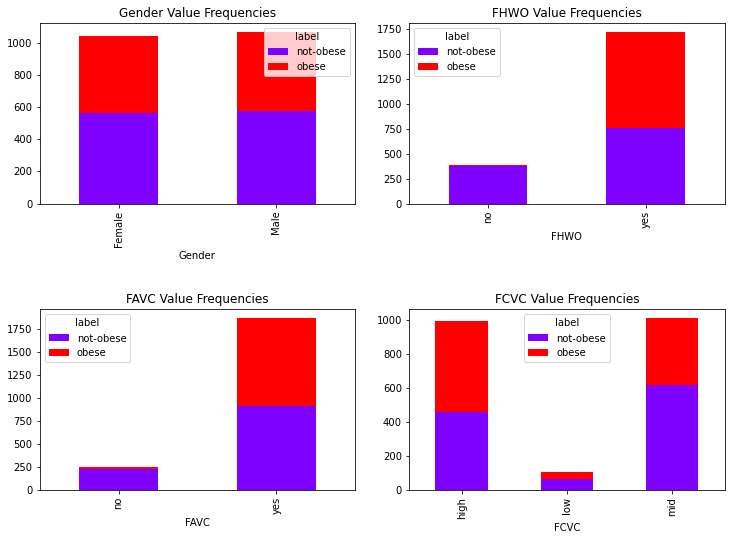

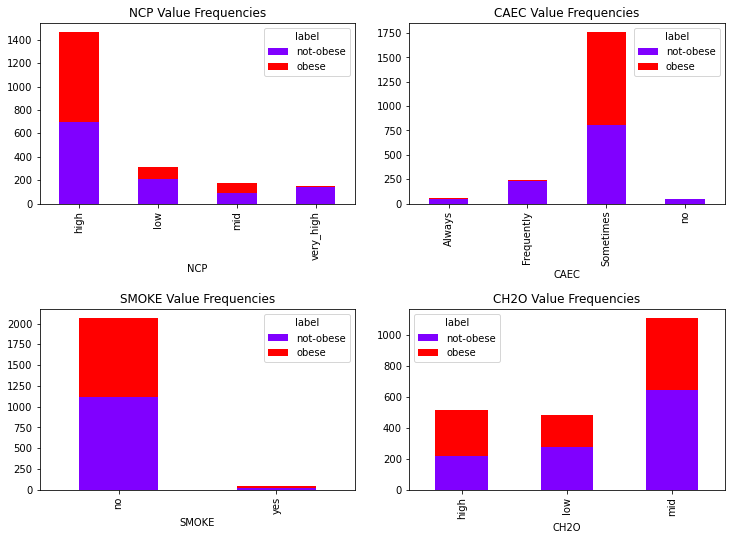

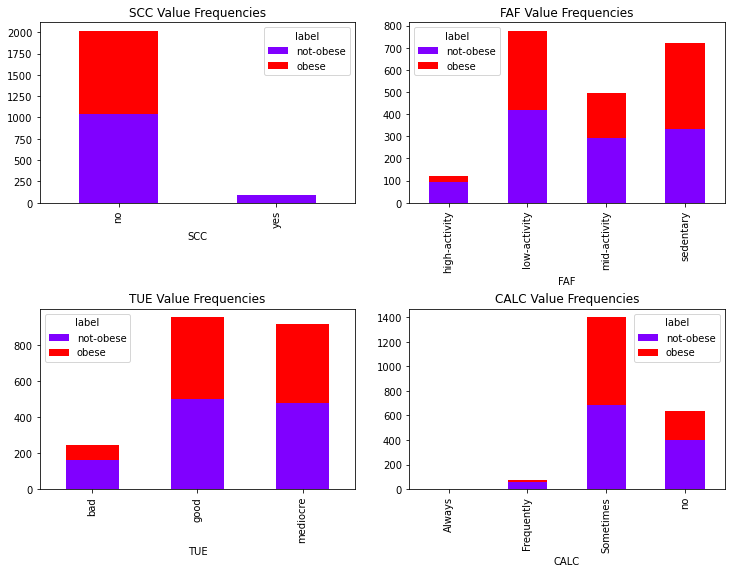

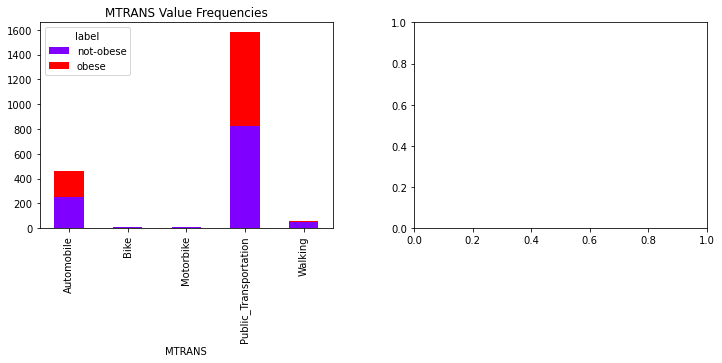

Mutual Information Matrix,Gender,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,label
Gender,NaN,0.000000,0.004244,0.043518,0.019865,0.000000,0.000000,0.000000,0.013661,0.027782,0.000650,0.010890,0.026510,0.000000
FHWO,0.014098,NaN,0.015017,0.011610,0.002247,0.062312,0.000539,0.000000,0.015146,0.004063,0.002744,0.000000,0.013526,0.110600
FAVC,0.016700,0.022779,NaN,0.006566,0.017849,0.008097,0.005764,0.002173,0.011947,0.000000,0.000000,0.023087,0.000114,0.045402
FCVC,0.045840,0.003102,0.000249,NaN,0.012671,0.021097,0.000000,0.013363,0.000930,0.000000,0.032610,0.011457,0.010503,0.011299
NCP,0.008555,0.000760,0.007041,0.007768,NaN,0.020488,0.002741,0.000000,0.000832,0.021143,0.007923,0.008935,0.012738,0.027495
CAEC,0.010461,0.051465,0.013755,0.000000,0.019692,NaN,0.004847,0.028217,0.002254,0.009647,0.019622,0.018284,0.027818,0.074333
SMOKE,0.000167,0.000000,0.000000,0.021901,0.004657,0.000000,NaN,0.016298,0.000689,0.000000,0.000000,0.008017,0.000000,0.000000
CH2O,0.005933,0.009770,0.013004,0.013379,0.009095,0.018464,0.003745,NaN,0.007749,0.033453,0.009862,0.001275,0.032274,0.019280
SCC,0.001931,0.025868,0.020565,0.000000,0.000000,0.001233,0.000021,0.004374,NaN,0.000000,0.000000,0.015314,0.003112,0.026908
FAF,0.040924,0.002273,0.009513,0.012364,0.033710,0.000000,0.000000,0.015193,0.000000,NaN,0.000000,0.015124,0.019696,0.002797


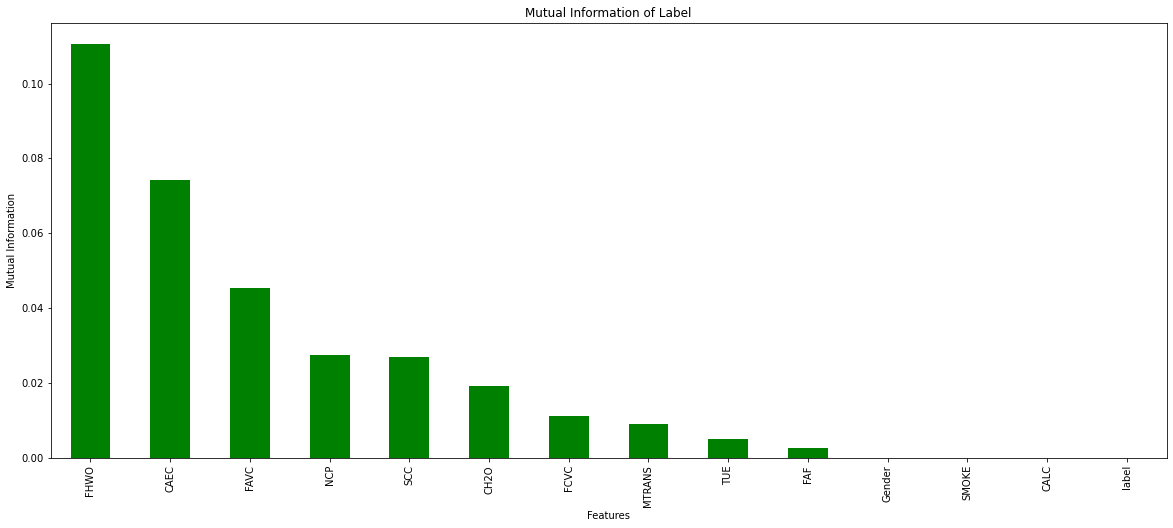

In [15]:
##############################################################################

### OBESITY ###

# Proecess and encode
instances, labels = preprocess('obesity.csv')
    
# Gather mutual information
feature_selection(instances, labels)

##############################################################################

#### Mutual Information Test 2: Bank-Marketing Dataset

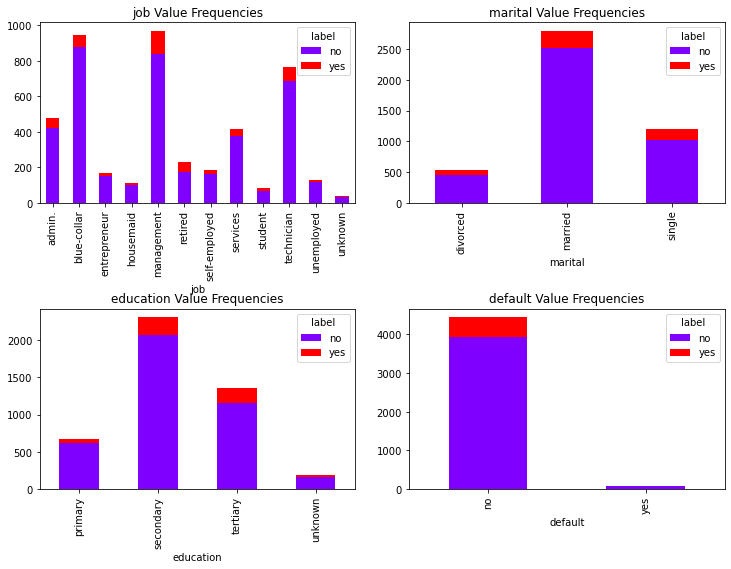

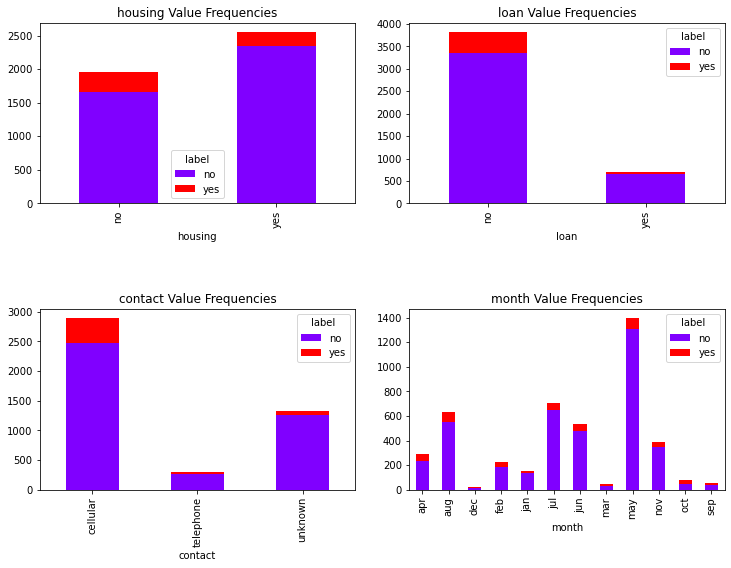

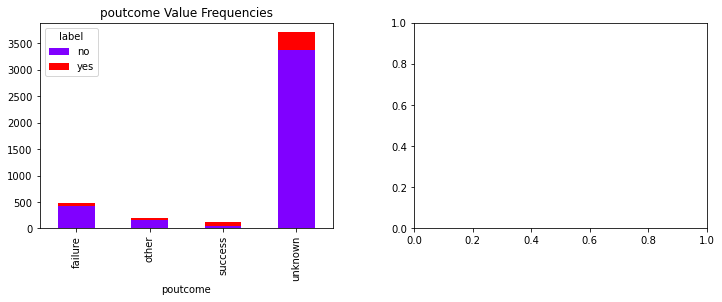

Mutual Information Matrix,job,marital,education,default,housing,loan,contact,month,poutcome,label
job,NaN,0.046709,0.318847,0.000000,0.044137,0.009825,0.017900,0.076754,0.000052,0.007446
marital,0.043696,NaN,0.028264,0.001353,0.006457,0.000000,0.000000,0.000000,0.000000,0.001827
education,0.307462,0.027705,NaN,0.001680,0.019357,0.012587,0.021558,0.010063,0.005111,0.000000
default,0.000000,0.000908,0.010029,NaN,0.000000,0.000000,0.000000,0.000000,0.005280,0.005347
housing,0.037499,0.012090,0.016229,0.000000,NaN,0.000000,0.031642,0.140431,0.010192,0.001394
loan,0.000000,0.000000,0.016453,0.003390,0.000000,NaN,0.000000,0.005342,0.011069,0.001726
contact,0.019265,0.008267,0.034812,0.000000,0.031387,0.000000,NaN,0.286490,0.053817,0.008710
month,0.072753,0.000000,0.002776,0.003259,0.139276,0.010571,0.292155,NaN,0.065160,0.010645
poutcome,0.000000,0.001824,0.000000,0.002097,0.020678,0.001818,0.062476,0.059110,NaN,0.028328
label,0.017471,0.006532,0.008820,0.000000,0.001954,0.001989,0.010591,0.008255,0.020932,NaN


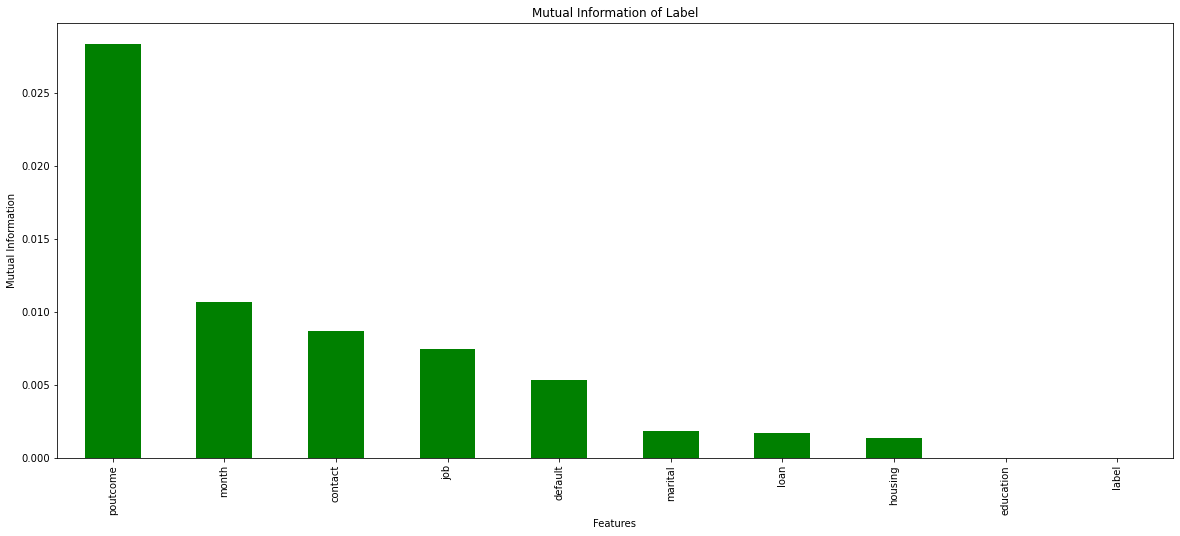

In [16]:
##############################################################################

### Bank-Marketing ###

# Proecess and encode
instances, labels = preprocess('bank-marketing.csv')
    
# Gather mutual information
feature_selection(instances, labels)

##############################################################################

#### Mutual Information Test 3: Student Dataset

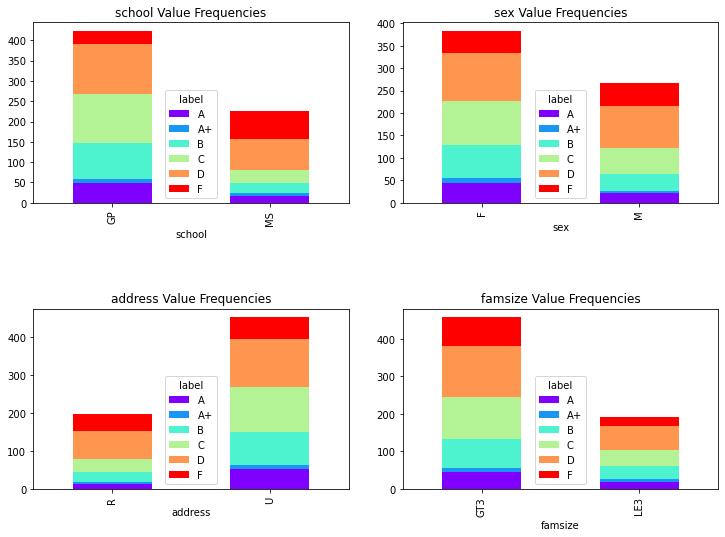

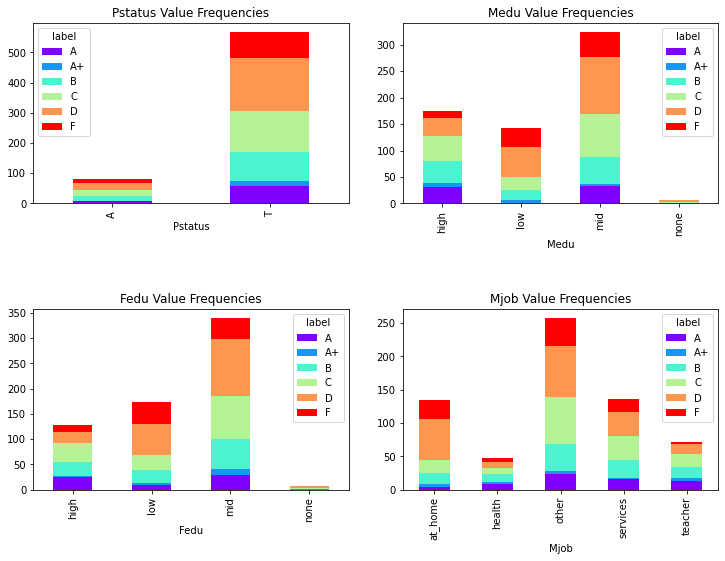

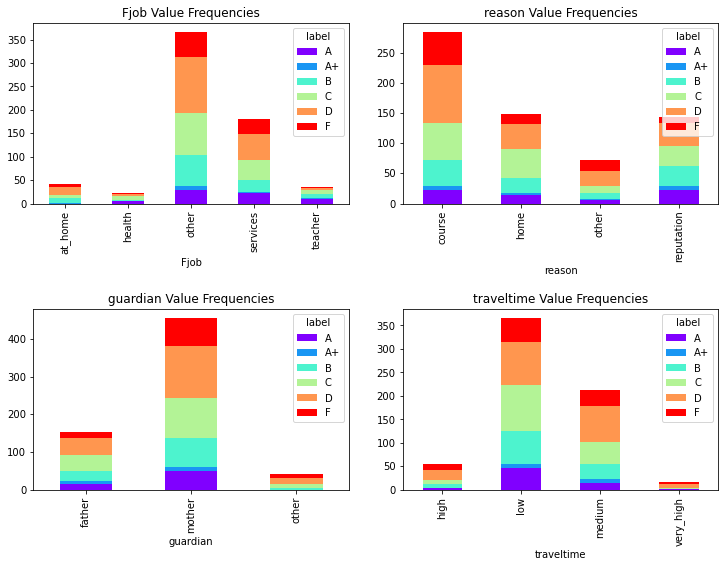

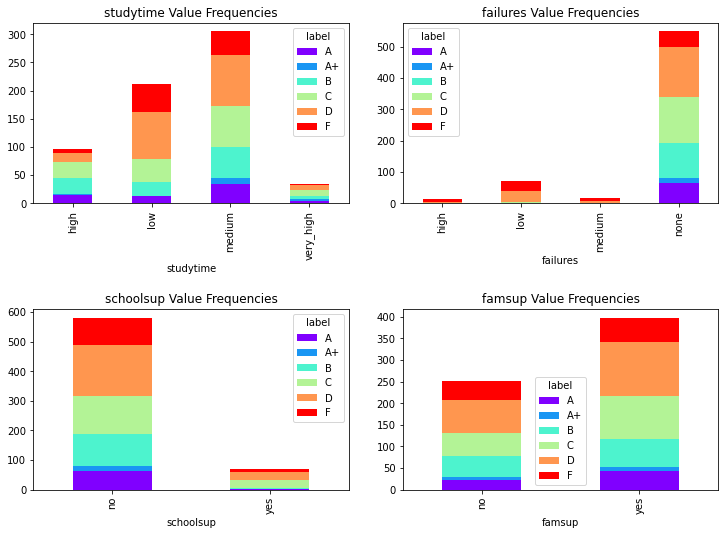

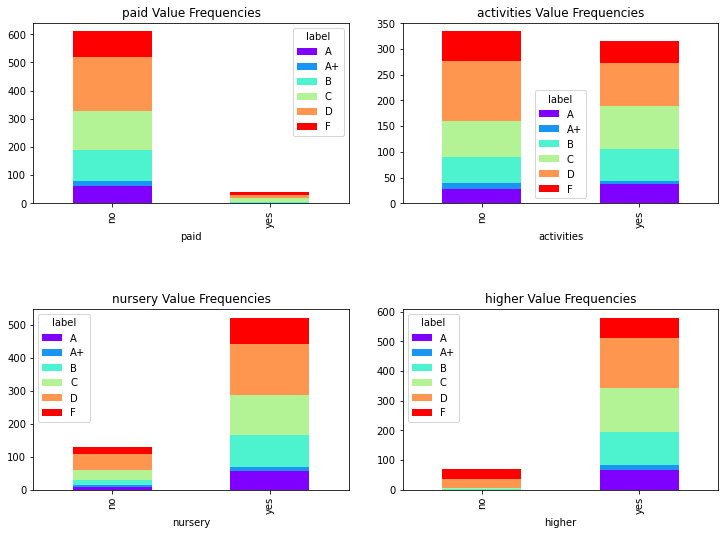

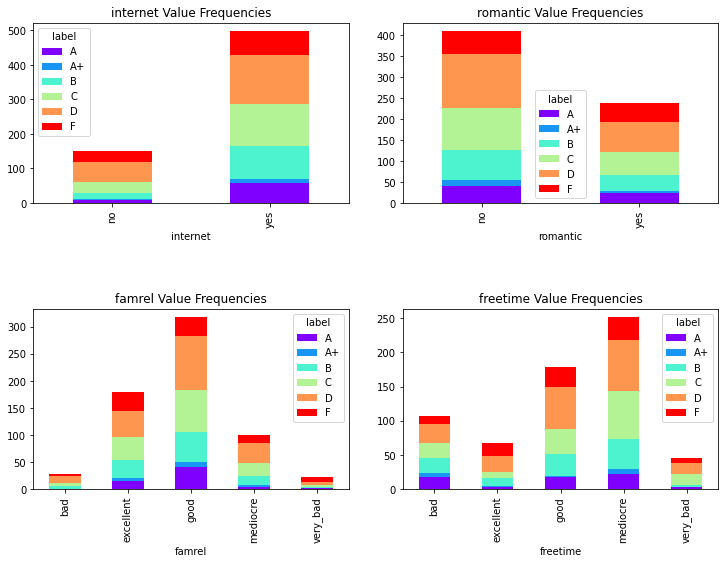

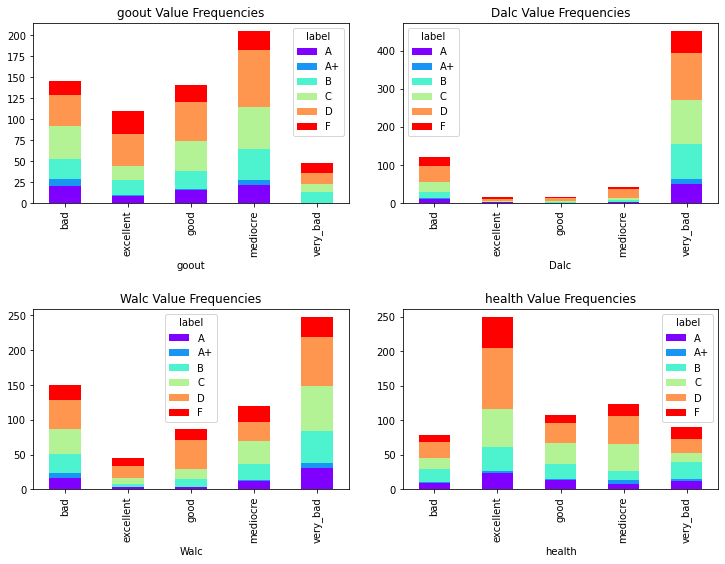

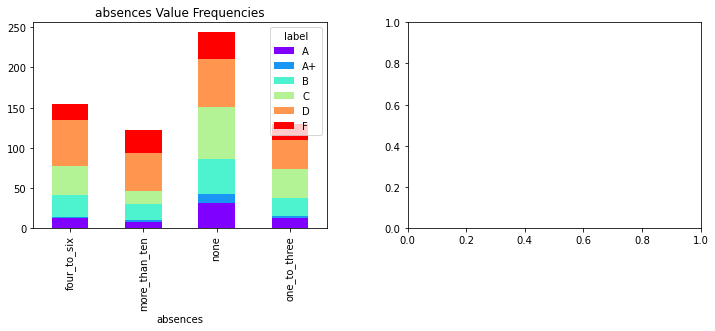

Mutual Information Matrix,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,label
school,NaN,0.005103,0.078220,0.018670,0.000000,0.023567,0.028135,0.042344,0.026806,0.048192,...,0.018283,0.021669,0.049944,0.048626,0.024321,0.011874,0.001427,0.004022,0.003699,0.078256
sex,0.000000,NaN,0.007337,0.000000,0.000000,0.042416,0.041911,0.000000,0.000000,0.017879,...,0.009925,0.000000,0.055643,0.000000,0.021973,0.025979,0.006282,0.016179,0.000000,0.058031
address,0.061342,0.040015,NaN,0.000000,0.000000,0.055202,0.041467,0.034411,0.000510,0.027213,...,0.042779,0.000000,0.000000,0.000000,0.039360,0.005399,0.000000,0.045693,0.000000,0.000000
famsize,0.034520,0.027510,0.000577,NaN,0.012887,0.015947,0.000000,0.026946,0.004344,0.000511,...,0.006669,0.000000,0.000000,0.000000,0.000000,0.000000,0.006019,0.000000,0.000000,0.000000
Pstatus,0.000000,0.005379,0.020636,0.035653,NaN,0.030264,0.058537,0.000000,0.009949,0.000000,...,0.000884,0.000000,0.000000,0.000000,0.018628,0.000000,0.032253,0.000000,0.000000,0.002765
Medu,0.016333,0.012745,0.000000,0.000000,0.000000,NaN,0.255170,0.278731,0.087456,0.008983,...,0.039745,0.000000,0.000000,0.000000,0.000000,0.014851,0.000000,0.000000,0.023860,0.046107
Fedu,0.014651,0.002352,0.000000,0.000000,0.000000,0.253597,NaN,0.101024,0.133372,0.007285,...,0.030743,0.000000,0.010551,0.000000,0.000000,0.000000,0.000000,0.000000,0.015225,0.019089
Mjob,0.017773,0.009834,0.032613,0.000000,0.010206,0.270851,0.151396,NaN,0.048225,0.000000,...,0.045258,0.020697,0.001414,0.024503,0.009206,0.000000,0.000000,0.000000,0.006940,0.034505
Fjob,0.035457,0.015648,0.033083,0.013197,0.000000,0.050415,0.162854,0.063931,NaN,0.025013,...,0.000000,0.034698,0.012420,0.000000,0.006599,0.000000,0.000000,0.000000,0.000000,0.032084
reason,0.032303,0.011931,0.018656,0.000000,0.007542,0.000000,0.019917,0.000000,0.000412,NaN,...,0.000000,0.000000,0.000000,0.009715,0.019955,0.022141,0.058442,0.063332,0.006836,0.024550


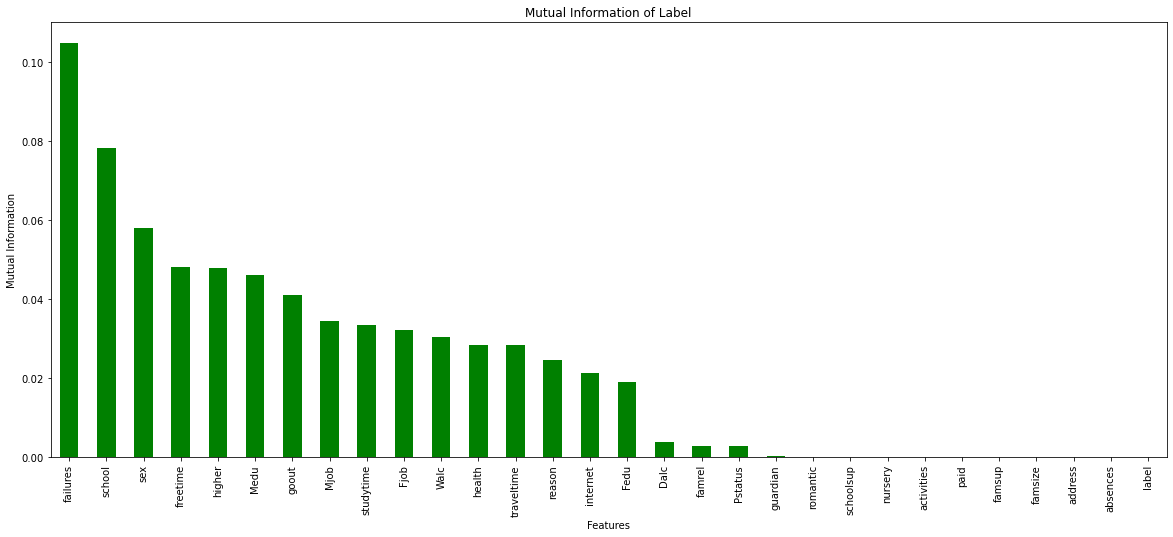

In [17]:
##############################################################################

### STUDENT ###

# Proecess and encode
instances, labels = preprocess('student.csv')
    
# Gather mutual information
feature_selection(instances, labels)

##############################################################################

### Feature Selection Interpretation

Provide your text answer to **Question 3.a** of 100-150 words in this cell.

#### Q3. a.) The “Feature selection” lecture discussed properties of valuable features. Using Mutual information, plotting and data visualization, explore the utility of different features in the Obesity and one additional dataset of your choice. Are different features of different utility to your classification task? Explain why. 

Different features have different utilities. Considering the Obesity dataset, around two thirds of our features have utility in our classification task. For simplicity, I will consider the top two most and least effective features (because four features appear to be independent from label, I will pick randomly):
- 'family_history_with_obesity" (FHWO):
    - MI score: 0.1106
    - Justification: our graph of frequencies reveals a high correlation between the feature values and our two classes. An individual with no 'FHWO', is pretty much certain to be 'not-obese' themselves. Whilst FHWO 'yes' values is split between 'obese' and 'not-obese' labels, this value represents nearly the entirety of 'yes' distribution. Thus, the split of FHWO's values makes for its predictive power, and explains why it is also picked for the One-Rule Model feature.
- 'consumption of food between meals' (CAEC):
    - MI score: 0.0743
	- Justification: the values of CAEC map an oddly across classes. Most 'obese' labels are isolated to the value 'Sometimes', whereas 'not-obese' is split between the rest. Whilst this discrepency should provide high utility, it is hampered by the fact CAEC's distribution is essentially isolated to 'Sometimes'. When given a new instance with the value of 'Always', 'Frequently', or 'No', the likelihood of this person being 'not-obese' is high. Whereas, given 'Sometimes', it appears we have a 50-50 split, lessening the predictive power. 
- 'Gender':
    - MI score: 0
	- Justification: whilst obesity within certain genders might lead to different health risks, it makes sense that the samples reveal an independence between Obesity and Gender. Looking at our frequency graph, we can see that both Genders sampled are equally represented, and evenly split the outcomes of our Obesity label, hence their outcome. 
- 'Smoke':
    - MI score: 0
    - Justification: the problem with this feature is a majority of the dataset represents non-smokers. Even so, between our 'yes' and 'no' values for being a smoker, both classes of obesity are evenly represented, hence the indication of independence.

In terms of feature selection, we could remove 'Gender', 'Smoke', 'CALC' from our dataset, and not lose any utility from our model.

For our Student dataset, around half of our features provide utility to the performance of our model. Again, I will consider the top and (random) bottom two features, to understand how the data distribution per feature impacts utility.
- 'Failures':
    - MI score: 0.1048
    - Justification: the frequency distribution reveals a high correlation between lower grades ('F', 'D', 'C') and an increasing level of failure ('high', 'low', 'medium'). Given our dataset is largely made up instances with outcomes in 'D', 'C' range, it makes sense that Failure and its strong relationship with these classes would strengthen the model. Intuitively, this also makes sense, as failure itself is a metric of a grade. Where there are more failures, there are more 'F's. 
- 'School':
    - MI score: 0.0782
    - Justification: looking at the frequency distribution of 'School', we see that 'GP' has a more even distribution in terms of grade outcomes, whilst 'MS' leans more towards the lower end of the grading spectrum. This adds utility, because if a new random individual is from 'MS', then they would have a higher likelihood (nearly 50%) of having a 'D' or 'F' grade, which are again, are two classes that are highly represented within the dataset.
- 'Family size':
    - MI score: 0
	- Justification: as we'd expect of a feature independent of class, looking at our frequency distributions, each value of 'Family Size' has a similar distribution of class labels. Perhaps because this feature is binarized, we lack the ability to gain insight into how family size could impact grades. Potentially, if it were real valued instead, then we might expect grades to fall as family size increases, as the individual might have more domestic responsibilities in looking after siblings and so on. As is, the feature doesn't offer any utility. 
- 'Romantic':
    - MI score: 0
    - Justification: again, looking at the frequency distribution, both feature outcomes show equivalent proportions of grade scores. Hence, having a romantic partner doesn't offer any information about how to classify a new instance. 

In terms of feature selection, we could remove the bottom ten attributes from our dataset without affecting performance.

Provide your text answer to **Question 3.b** of 100-150 words in this cell.

#### Q3. b.) Explain the ‘naivety’ assumption underlying Naive Bayes. (1) Why is it necessary? (2) Why can it be problematic? Ground your discussion in the features of two (or all) of the data sets provided for this assignment. The 'naivety' of Naive Bayes model comes from it's unrealistic but practical assumption of conditional independence amongst features within the given dataset. 

In terms of practicality, the 'naivety' assumption allows for a simple calculation of the Bayes rule (computing conditional probability given its inverse), without the complexity of folding chain rules. Independence between features means we merely have to compute the probability of a class appearing given a set of features P(y|xs) as the product of likelihoods of a feature appearing given that class multiplied by the prior probability of that class. 

In terms of realism, this assumption is fraught:
- First, consider the Bank Marketing dataset, the naive assumption means that 'job' is independent from 'education' in terms of their contribution to an individual subscribing to a term deposit. Here, they have an extremely strong mutual information score of  0.3075 (education->job) and 0.31887 (job->education) respectively. 
- Second, consider the student dataset, similar to above, there are two sets of features which are statistically and intuitively strongly correlated with one another: (Mother's Education, Mother's Job), (Father's Education, Father's Job). The former tuple has one of the strongest mutual information indicators in the dataset, with 0.2787 and 0.27090 respectively. We can understand why, as each occupation requires a certain level of training as a barrier to entry. The same applies to the latter tuple. 

Thus we see how Naive Bayes can be problematic, it introduces inductive bias into our representation of the distribution. Which, as we saw with our cross-validation stage, can be more problematic for more complex datasets like Student. 

# Question 4: Feature Selection and Ethics [4 marks]

### Fairness Through Unawareness Functionality

In [18]:
# Write additional code here, if necessary (you may insert additional code cells)

##############################################################################

# Process
instances, labels = preprocess('student.csv')
truth = labels.tolist()

# Full dataset
model = Mnb(instances, labels)
predict_probs, predictions = predict(model, instances)
full_message = "---- UNFAIR DATASET ----"
full_eval = evaluation(model, truth, predictions)

# Fairness through unawareness dataset
ftu_instances = instances.drop(['sex', 'health', 'school', 'Medu', 'Mjob', 
                                'Fedu', 'Fjob'], axis=1)
ftu_model = Mnb(ftu_instances, labels)
ftu_predict_probs, ftu_predictions = predict(model, ftu_instances)
ftu_eval = evaluation(ftu_model, truth, ftu_predictions)
ftu_message = "---- FAIRNESS THROUGH UNAWARENESS ----"

# Publish results
full_eval.publish(full_message)
ftu_eval.publish(ftu_message)

# Comparison through Error Rate Reduction
ERR = error_rate_reduction(truth, ftu_predictions, predictions)
print("-------------------------------------------------------------")
print("\nError rate reduction:", round(ERR, 4))
print("\n-------------------------------------------------------------")
print("-------------------------------------------------------------")

##############################################################################

-------------------------------------------------------------

Evaluation Report for Multinomial Naive Bayes Classifier

---- UNFAIR DATASET ----

Truth frequencies: {'A': 65, 'A+': 17, 'B': 112, 'C': 154, 'D': 201, 'F': 100}
Pred frequencies: {'A': 76, 'A+': 16, 'B': 94, 'C': 163, 'D': 211, 'F': 89}

Binary class evaluation metrics

	Accuracy:  0.4838
	Error:  0.5162

Multi (and binary) class evalution metrics

	Macro averaged precision:  0.4836
	Macro averaged recall:  0.4764
	Macro averaged fscore:  0.4785

	Micro averaged precision:  0.4838
	Micro averaged recall:  0.4838
	Micro averaged fscore:  0.4838

	Weigthed averaged precision:  0.4858
	Weighted averaged recall:  0.4838
	Weighted averaged fscore:  0.4835

-------------------------------------------------------------
-------------------------------------------------------------

Evaluation Report for Multinomial Naive Bayes Classifier

---- FAIRNESS THROUGH UNAWARENESS ----

Truth frequencies: {'A': 65, 'A+': 17, 'B': 112, 'C'

### Fairness Through Unawareness Interpretation

Provide your text answer to **Question 4.a** of 100-150 words in this cell.

#### Q4.a.) Discuss ethical problems which might arise in this application and lead to unfair treatment of the applicants. Ground your discussion in the set of features provided in the student data set.

The ethical consequences for an application that classifies college applicants into admitted and not-admitted based on grades using this dataset could lead to overt discrimination. How would this ethically egregious situation occur? Simply, rather than 'merit', people could begin to be classified as admitted based on group characteristics like sex, religion, or socio-economic background. We have seen this play out in Amazon's fraught hiring AI, which saw prospective applicants as essentially Male. Indeed, with our dataset, we have seen that 'sex' provides large utility to the model, so a situation could arise where accepted applicants are primarily Male. For the purposes of our dataset, we need only consult the protected attributes in the fair work act to understand which attributes could lead to discrimination. Moreover, for this application, we must define acceptance from statistics relevant to schooling, as opposed to backgrounds. The following attributes could lead to the following forms of discrimination:
- 'sex' could lead to gender disparity. 
- 'health' could lead to disability discrimination.
- 'Medu', 'Mjob', 'Fedu', 'Fjob', 'school' could lead to class discrimination.

We might wonder why a feature like 'School' could be problematic. Within our dataset, this feature has strong utility given its mutual information, where one school 'MS' is more predictive of the lower grade scale, and thus more likely to lead to rejection. We can imagine why this difference, 'GP' could be a school with private tuition, whilst 'MS' is public. If acceptance were to be judged on 'School' as well family background features, then a classist bias becomes inherent to the model (pun intended).

Provide your text answer to **Question 4.b** of 100-150 words in this cell.

#### Q4. b.) Remove all ethically problematic features from the data set (use your own judgment), and train your Naive Bayes classifier on the resulting data set. How does the performance change in comparison to the full classifier?

Our performance has decreased with the removal of the problematic attributes aroudn gender, disability, and class. Utilising our error rate reduction measure, with the full dataset as our baseline model, we can see that error has increased by about 8%. Similarly, our multi-class evaluation metrics have seen a decrease. As seen in the feature selection stage, these attributes add utility to the classifier, but for their possible ethical consequences, the error should be maintained. Moreover, we can consider this loss in performance intuitively, as the fairness through unawareness model simply has less data to work with, and thus it makes sense that it would be affected. 

Provide your text answer to **Question 4.c** of 100-150 words in this cell.

#### Q4. c.) The approach to fairness we have adopted is called “fairness through unawareness” – we simply deleted any questionable features from our data. Is removing all problematic features as done inpart (b) guarantee a fair classifier? Explain Why or Why not?

Fairness throughy unawareness (removing all problematic features) doesn't guarantee a fair classifier. This form of feature selection is explicit regarding groups of people and thus discrimination (gender, family income, sex, religion, country of origin), and so is intimately tied to unfairness. However, thinking about the correlation or dependence between features, which we have already discussed is an unrealistic assumption, these discriminatory features might be represented in un-explicit features where there is strong correlation. For example, an individual's address, or family support, are likely to also configure within its representation information about the person's wealth, and even ethnicity, as suburbs largely conform to certain demographics of people. Thus, because of the possibility of feature dependence, unfairness might propagate into seemingly 'fair' attributes.


<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: Timothy Holland 697004
   
   <b>Dated</b>: 02/09/2022

Timothy Holland 697004 02/09/2022